![](../logo.png)

# K-means clustering

## Yoav Ram

In this exercise we will use experiment with K-means clustering.

K-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster (see [Wikipedia](https://en.wikipedia.org/wiki/K-means_clustering)). There's a good visual explanation [here](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/).

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
import numpy as np
import pandas as pd
from ipywidgets import interact

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

# Example: digits dataset

We use the digits dataset that we already saw in the [PCA session](../notebooks/PCA.ipynb).

Since we know the correct classification, we can use that to verify that the clustering works well.

In [6]:
digits = load_digits()
X = digits.data
n_samples, n_features = X.shape
Y = digits.target
n_digits = len(np.unique(Y))
labels = digits.target

def plot_digit(im, ax=None):    
    if ax is None: fig, ax = plt.subplots(figsize=(1,1))
    ax.imshow(im, norm=BoundaryNorm(np.unique(X), 255), cmap='gray_r')
    ax.set(xticks=[], yticks=[])
    
@interact(index=(0, X.shape[0], 1))
def explore_digits(index=0):
    im = X[index].reshape((8, 8))
    plot_digit(im)
    print("Digit:", labels[index])

interactive(children=(IntSlider(value=0, description='index', max=1797), Output()), _dom_classes=('widget-inte…

As usual in Scikit-learn, we start by creating the model and fitting it to the data.
This is an unsupervised learning algorithm, so `y` is not required (and indeed ignored if given).

In [7]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)

KMeans(n_clusters=10)

Now we can do several things. First, lets look at the centeroid of each cluster by taking `cluster_centers_`.

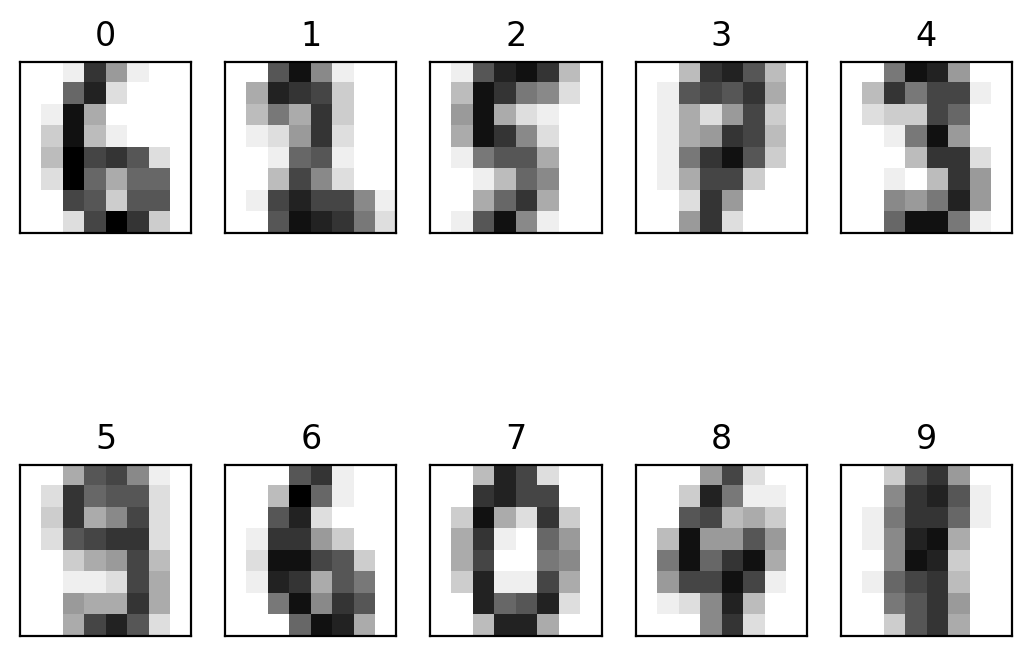

In [8]:
fig, axes = plt.subplots(2, 5)
for cluster, cluster_center, ax in zip(range(10), kmeans.cluster_centers_, axes.flat):
    ax.set_title(cluster)
    plot_digit(cluster_center.reshape((8, 8)), ax=ax)

We can also `predict` on the test data to get the cluster of each test sample.

In [10]:
cluster = kmeans.predict(X)

print("Clusters for test digits")
for i in range(10):
    print(i)
    print(Y[cluster==i])

Clusters for test digits
0
[6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 5 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6]
1
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2
 2 2 2 2 2 1 2 1 2 1 2 3 1 2 2 2 1 2 2 2 1 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 1 2 2 2 8 2 2 1 2 1 2 1 2 1 2 2 1 2 1 2 2 1 2 1 1 1 1 1 2 2 2
 2 2 2 8 2 2 2 2 2 2 2 8 2 2 2 2 2 2 2 2 2 2 2 8 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
2
[5 5 5 5 5 8 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 9 5 5 5 5 5 5 5 5 5 5 5 8 8 5 5 5 8 5 1 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 8 5 5 5 9 9 5 5 5 5 5 5 5 9 9 5 5 3 5 5 5 5 5 3
 5]
3
[7 7 7 7 7 7 2 7 9 7 7 7 3 7 7 7 7 7 7 7 7 7 7 2 7 7 7 3 7 7 7 9 7 9 7 7 7
 7 7 9 9 7 7 9 7 9 7 7 7 9 7 7 7 7 7 7 7 7 7 7 7 7

## Visualization

If we first apply PCA to the data, then we can apply K-means on PCA-reduced data, which will allow us to plot the results.

Here we can see the PCA transformed points in black circles, the K-means centroids in white x-marks, and the K-means clusters in different background colors.

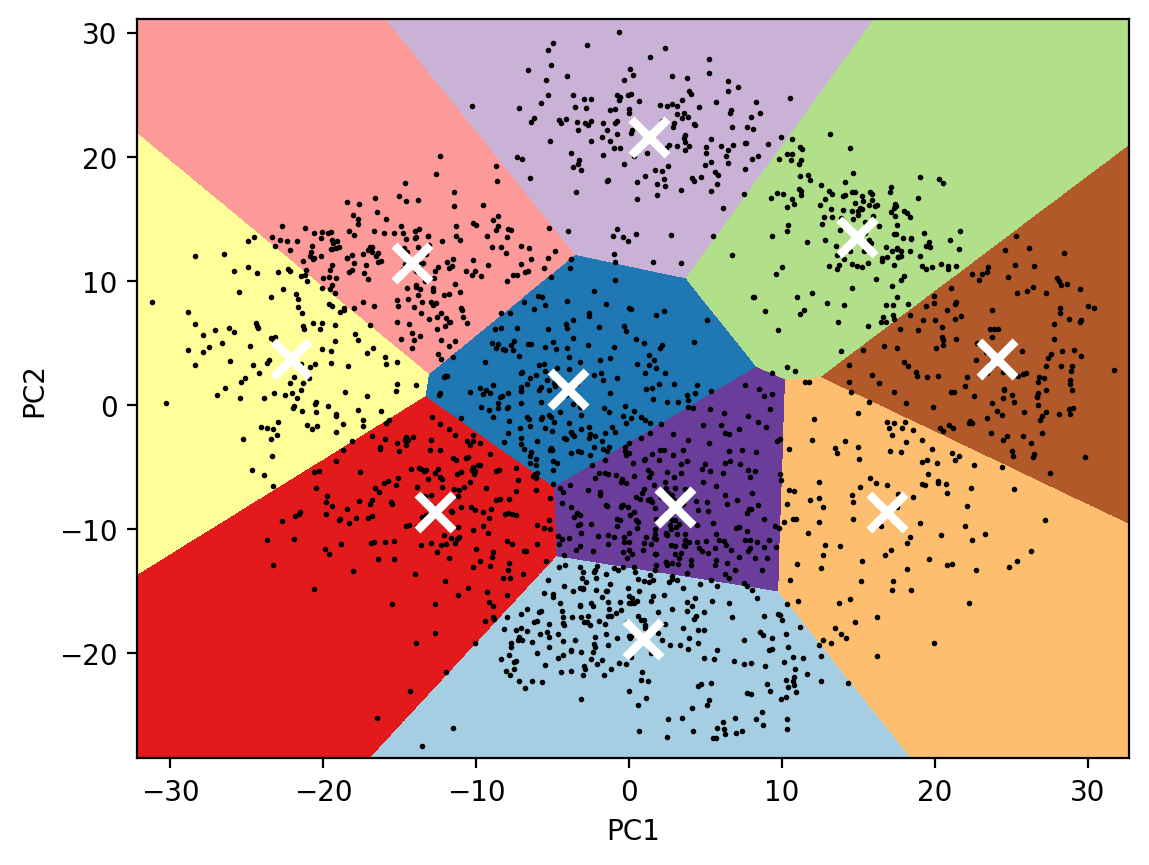

In [11]:
X_ = PCA(n_components=2).fit_transform(X)

# Plot the decision boundary. For that, we will assign a color to each
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_[:, 0].min() - 1, X_[:, 0].max() + 1
y_min, y_max = X_[:, 1].min() - 1, X_[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# fit Kmeans on reduced data
kmeans = KMeans(n_clusters=10)
kmeans.fit(X_)
# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(X_[:, 0], X_[:, 1], 'k.', markersize=2)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.xlabel('PC1')
plt.ylabel('PC2');

# Colophon
This notebook was written by [Yoav Ram](http://python.yoavram.com).

This work is licensed under a CC BY-NC-SA 4.0 International License.

![Python logo](https://www.python.org/static/community_logos/python-logo.png)